In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
#import ruptures as rpt

In [2]:
df = pd.read_csv("../data/BrentOilPrices.csv")
df

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
...,...,...
9006,"Nov 08, 2022",96.85
9007,"Nov 09, 2022",93.05
9008,"Nov 10, 2022",94.25
9009,"Nov 11, 2022",96.37


In [10]:
# Load Brent oil price data
df = pd.read_csv("../data/BrentOilPrices.csv")


# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True, errors='coerce')

# Drop rows where date parsing failed
#df.dropna(subset=['Date'], inplace=True)

# Set and sort

df.sort_index(inplace=True)


print(df.head())




        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB


In [12]:
df.shape

(9011, 2)

In [16]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [17]:
# Check for missing values and duplicates
print("Missing values:", df.isnull().sum())

Missing values: Date     0
Price    0
dtype: int64


###  Visualize the Brent Oil Prices

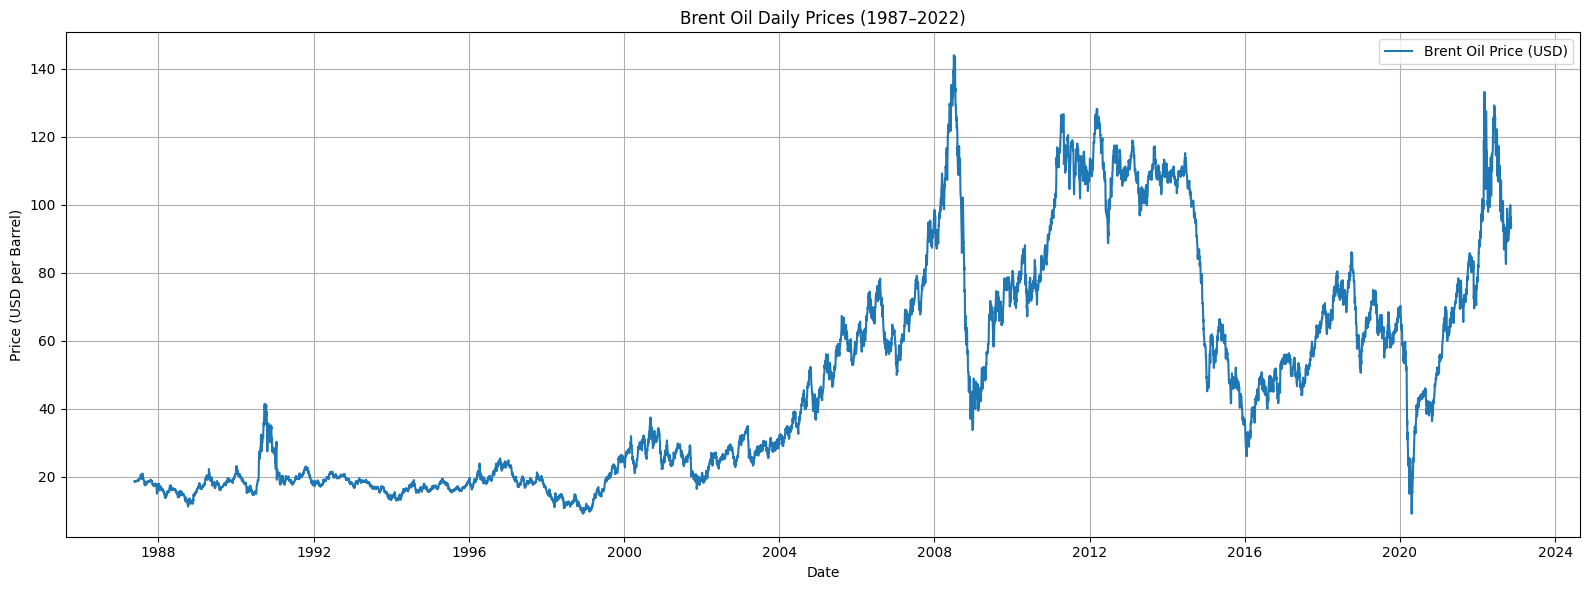

In [18]:
plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price (USD)')
plt.title("Brent Oil Daily Prices (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per Barrel)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


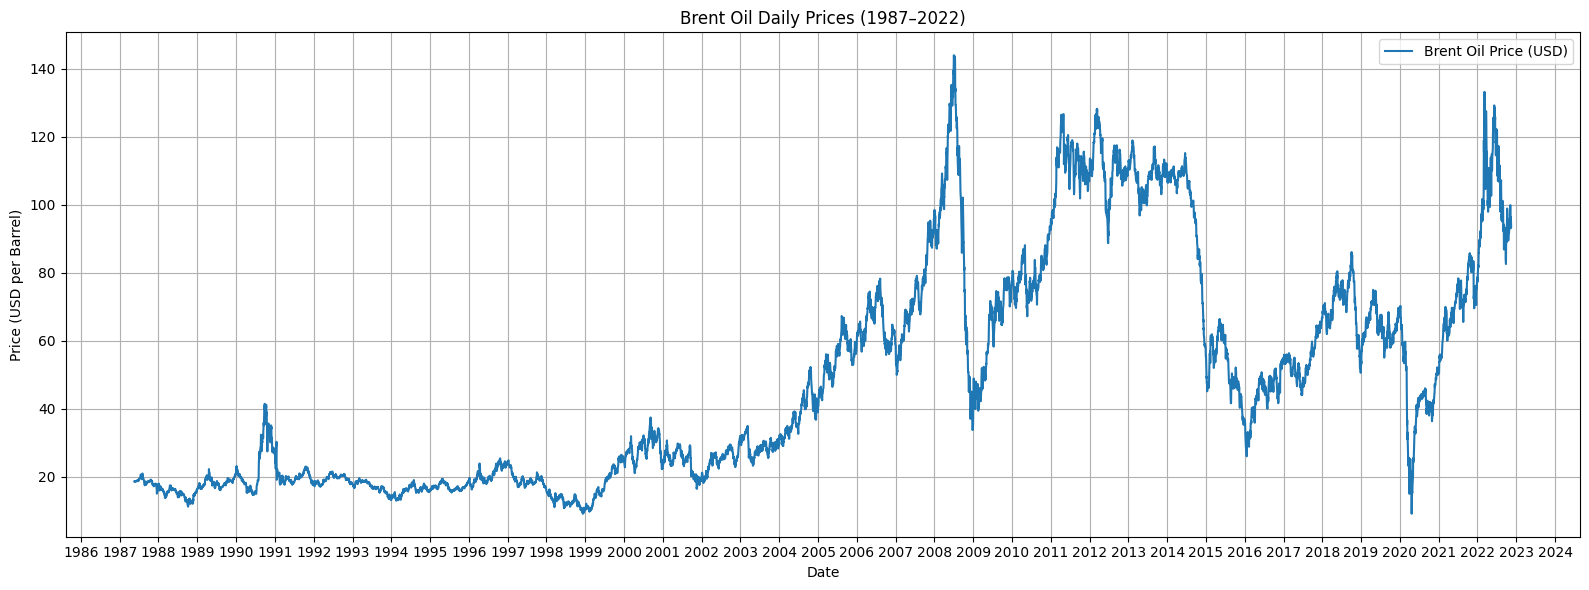

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price (USD)')

# Title and labels
plt.title("Brent Oil Daily Prices (1987–2022)")
plt.xlabel("Date")
plt.ylabel("Price (USD per Barrel)")

# Format the x-axis to show every year
plt.gca().xaxis.set_major_locator(mdates.YearLocator(1))  # every year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # format as 1990, 1991, etc.

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Time Series Properties – Stationarity Test (ADF)

In [20]:
result = adfuller(df['Price'].dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("The series is likely non-stationary (p > 0.05)")
else:
    print("The series is likely stationary (p ≤ 0.05)")


ADF Statistic: -1.993856011392467
p-value: 0.2892735048934032
The series is likely non-stationary (p > 0.05)


In [21]:
df['Price_diff'] = df['Price'].diff()

# ADF test on differenced data
result_diff = adfuller(df['Price_diff'].dropna())
print("ADF on differenced data:", result_diff[0])
print("p-value:", result_diff[1])


ADF on differenced data: -15.529367580048051
p-value: 2.230740510516169e-28


### Rolling Statistics

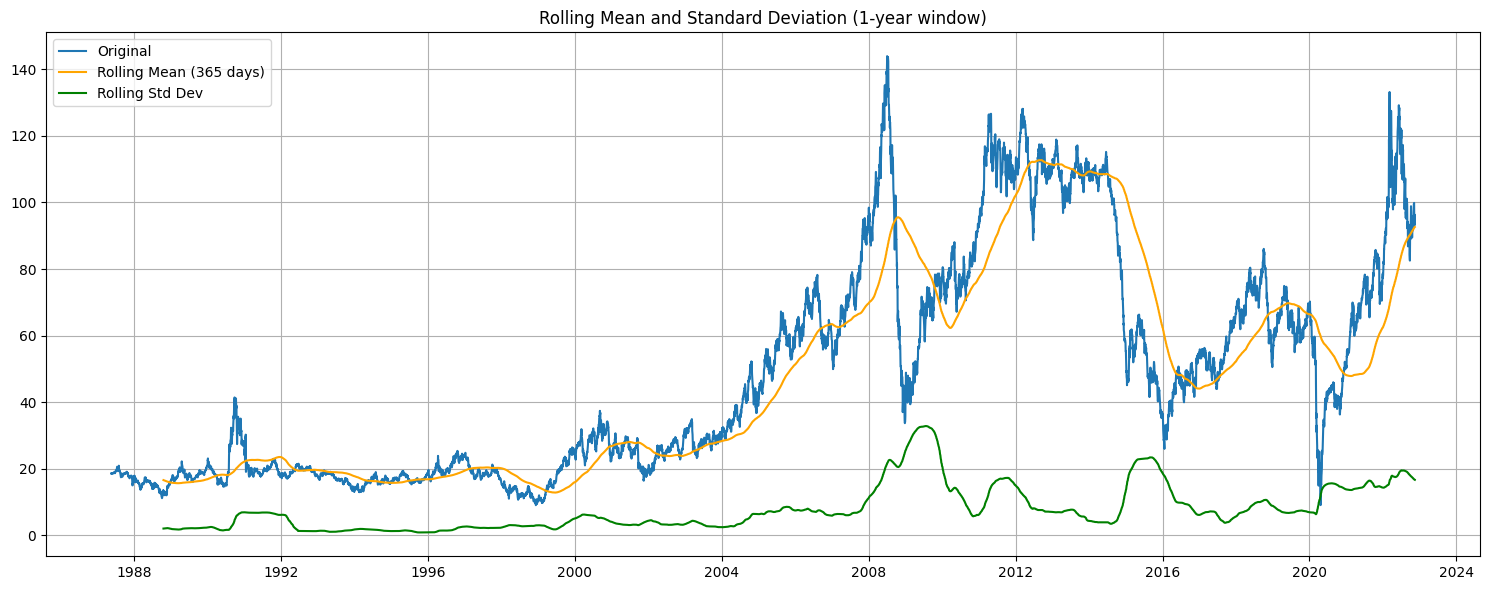

In [22]:
rolling_mean = df['Price'].rolling(window=365).mean()
rolling_std = df['Price'].rolling(window=365).std()

plt.figure(figsize=(15, 6))
plt.plot(df['Date'], df['Price'], label='Original')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean (365 days)', color='orange')
plt.plot(df['Date'], rolling_std, label='Rolling Std Dev', color='green')
plt.title("Rolling Mean and Standard Deviation (1-year window)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Change Point Detection

In [ ]:
# Change Point Detection
signal = df['Price'].dropna().values
model = "rbf"  # "rbf" captures changes in mean and variance
algo = rpt.Pelt(model=model).fit(signal)
result = algo.predict(pen=10)

# Plot change points
rpt.display(signal, result)
plt.title("Detected Change Points in Brent Oil Prices")
plt.tight_layout()
plt.show()

# Print change point dates
print("Detected change points:")
for idx in result[:-1]:  # skip last index (end of series)
    print(df['Date'].iloc[idx])


In [ ]:
#Overlay Events on Plot
events = pd.read_csv("../content/events.csv")
events['Start Date'] = pd.to_datetime(events['Start Date'])

plt.figure(figsize=(16, 6))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price', linewidth=1.5)

# Plot events
for _, row in events.iterrows():
    plt.axvline(row['Start Date'], color='red', linestyle='--', alpha=0.7)
    plt.text(row['Start Date'], df['Price'].max() - 10, row['Event Name'], rotation=90, verticalalignment='top', fontsize=8, color='red')

plt.title("Brent Oil Price with Key Events Overlayed")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()